<a href="https://colab.research.google.com/github/arstotrix/lsh-digital-collector/blob/main/digital_repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первым делом давайте подготовим данные.

На вашем Гугл-диске должно лежать два файла, один - со списком пожертвовавших через сайт, второй - полный список участников, преподов и оргов всех мастерских. Оба файла должны быть в формате xlsx. 

В списке всех мастерских должно быть 2 колонки: "ФИО" и "Мастерская" (без кавычек). Для каждого участника (препода, орга) должны быть указаны его ФИО (именно в таком порядке) и мастерская. В конечном итоге это должно выглядеть так:

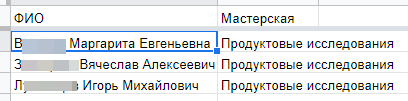

# Затем надо подключить Гугл-диск, что мы, собственно, и делаем. 

Программа будет спрашивать разрешения подключиться к Гугл-диску, его будет необходимо дать.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Теперь вам придётся немного покодить самим, но там не страшно. 

На вашем Гугл-диске должно лежать два файла, один - со списком пожертвовавших через сайт, второй - полный список участников. После того, как мы подключили Гугл-диск к этой программе, мы можем доставать файлы прямо оттуда.

Нажмите на папку слева (слева панелька с 4 элементами: меню, лупа, икс в скобках и папка, вот на неё). Теперь спуститесь в drive, потом в MyDrive, и окажетесь на своём диске. Найдите на нём файл с пожертвовавшими и скопируйте полный путь к нему (наведите курсор на название, сбоку появятся три точки, нажмите на них, выпадет меню, выберите "Скопировать путь".) 

Теперь в ячейке ниже найдите переменную `donations`. Замените текст в двойных кавычках на скопированный путь к файлу, примерно так: `donations = "/content/drive/MyDrive/лш2022/Список пожертвовавших через сайт (2022) __ Обновляется ежедневно.xlsx"` 

Теперь проделайте то же самое со списком участников, но вместо переменной `donations` поменяйте переменную `workshops`

In [ ]:
donations = "/content/drive/MyDrive/лш2022/Список пожертвовавших через сайт (2022) __ Обновляется ежедневно.xlsx"
workshops = "/content/drive/MyDrive//лш2022/Списки участников мастерских 2022.xlsx"

In [3]:
donations = "/content/drive/MyDrive/_ЛШ2020-2021-2022-????_/лш2022/Варя таск/Список пожертвовавших через сайт (2022) __ Обновляется ежедневно.xlsx"
workshops = "/content/drive/MyDrive/_ЛШ2020-2021-2022-????_/лш2022/Варя таск/Списки участников мастерских 2022.xlsx"

In [ ]:
donations = "вставьте сюда полный путь к файлу с пожертвованиями, как в примере"
workshops = "вставьте сюда полный путь к файлу с участниками, как в примере"

Теперь мы читаем оба файла и смотрим, чтобы всё работало. 

Датасет don должен выглядеть так: 

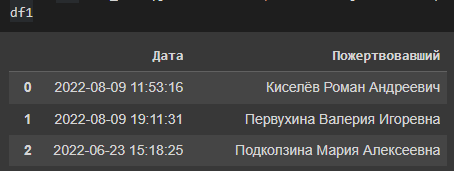

Датасет wsh - так:

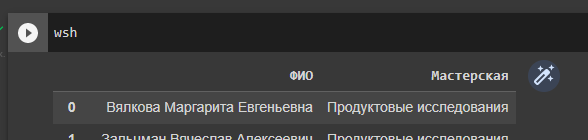

In [17]:
don = pd.read_excel(donations)
wsh = pd.read_excel(workshops)

In [ ]:
don = don.set_axis(['Дата', 'Пожертвовавший'], axis = 1)
don

In [ ]:
wsh

Теперь мы извлекаем ФИО сдавших деньги в отдельный список, а также создаём две функции - для поиска неплательщиков и для сокращения имени мастерской


In [12]:
payers = list(don['Пожертвовавший'])

In [14]:
# поиск неплательщиков

def abcde(a):
  i = 0
  if a in payers:
    i = 1
  return i

In [15]:
# краткое имя мастерской для графика

def short(a):
  return a[:8]

Теперь мы применяем обе функции: первая ищет ФИО участника в списке сдавших, вторая обрезает название мастерской, чтобы оно влезло на график (я смотрю на вас, мастерская перевода и локализации!)

In [20]:
wsh['Плательщики'] = wsh['ФИО'].apply(abcde)

In [21]:
wsh["Мастерская_короткая"] = wsh['Мастерская'].apply(short)

Теперь мы готовим данные для графика - мы считаем, сколько в каждой мастерской заплативших и не заплативших.

In [24]:
not_paid = wsh[wsh['Плательщики'] == 0].groupby('Мастерская_короткая').count()['ФИО']
paid = wsh[wsh['Плательщики'] == 1].groupby('Мастерская_короткая').count()['ФИО']
not_paid
for i in not_paid.index:
  if i not in paid.index:
    paid[i] = 0
for i in paid.index:
  if i not in not_paid.index:
    not_paid[i] = 0

In [25]:
paid = pd.Series.sort_index(paid)
not_paid = pd.Series.sort_index(not_paid)

А вот и сам график. Если кого-то плохо сократили, извините :(

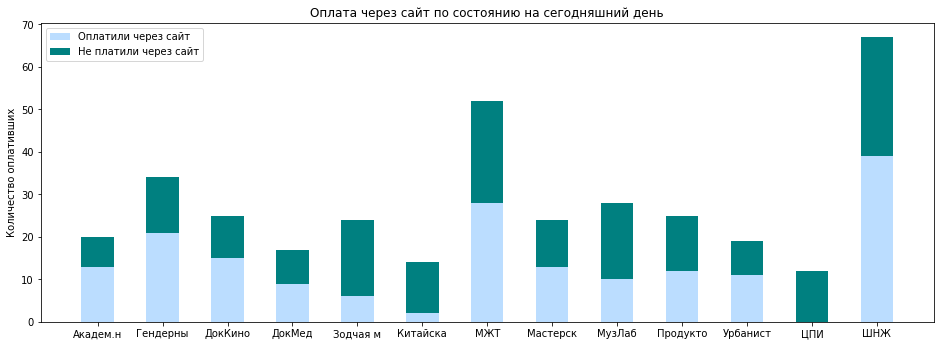

In [29]:
fig, ax = plt.subplots()
width = 0.5
plt.rcParams["figure.figsize"] = (16,5.5)

ax.bar(paid.index, paid, width, label='Оплатили через сайт', color = '#bbddff')
ax.bar(not_paid.index, not_paid, width, bottom = paid, label='Не платили через сайт', color = '#008080')

ax.set_ylabel('Мастерские')
ax.set_ylabel('Количество оплативших')
ax.set_title('Оплата через сайт по состоянию на сегодняшний день')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/paid_graph')

Вы хочете цифр? Их есть у меня. Вот этот код выведет количество оплативших и не оплативших в цифрах для каждой мастерской.

In [ ]:
wsh.groupby(['Мастерская', "Плательщики"]).count()['ФИО']

Мастерская                      Плательщики
Академ.навыки                   0               7
                                1              13
Гендерные Исследования          0              13
                                1              21
ДокКино                         0              10
                                1              15
ДокМед                          0               8
                                1               9
Зодчая мастерская               0              18
                                1               6
Китайская мастерская            0              12
                                1               2
МЖТ                             0              24
                                1              28
Мастерская культурной медиации  0              11
                                1              13
МузЛаб                          0              18
                                1              10
Продуктовые исследования        0              13
      

А если хотите поймать халявщиков пофамильно, то замените в следующей ячейке слова `Ваша Мастерская` на название вашей мастерской. Его нужжно будет скопировать из результата выполнения предыдущей ячечки или из самого файла, чтобы в запросе было, например, `Академ.навыки`, а не Академнавыки или АкадемНавыки. Питон очень чувствительный к такой штуке :(

И следите за пробелами!

In [31]:
wsh[(wsh['Мастерская'] == 'Ваша Мастерская') & (wsh['Плательщики'] == 0)]

,ФИО,Мастерская,Плательщики,Мастерская_короткая
238,Бурлакова Алена Сергеевна,Гендерные Исследования,0,Гендерны
246,Волкова Анна Дмитриевна,Гендерные Исследования,0,Гендерны
251,Зыкова Дарья Александровна,Гендерные Исследования,0,Гендерны
253,Кузьмина Наталья Егоровна,Гендерные Исследования,0,Гендерны
254,Соколов Евгений Сергеевич,Гендерные Исследования,0,Гендерны
256,Витальская Аполлинария Ильинична,Гендерные Исследования,0,Гендерны
263,Анна Край (Иванова),Гендерные Исследования,0,Гендерны
264,Кулиева Алмара,Гендерные Исследования,0,Гендерны
265,Головина Анна,Гендерные Исследования,0,Гендерны
266,Погребняк Мария,Гендерные Исследования,0,Гендерны
